## 01 Fitness Converge

/tmp/ipykernel_1045897/4083513832.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend(loc='lower right')


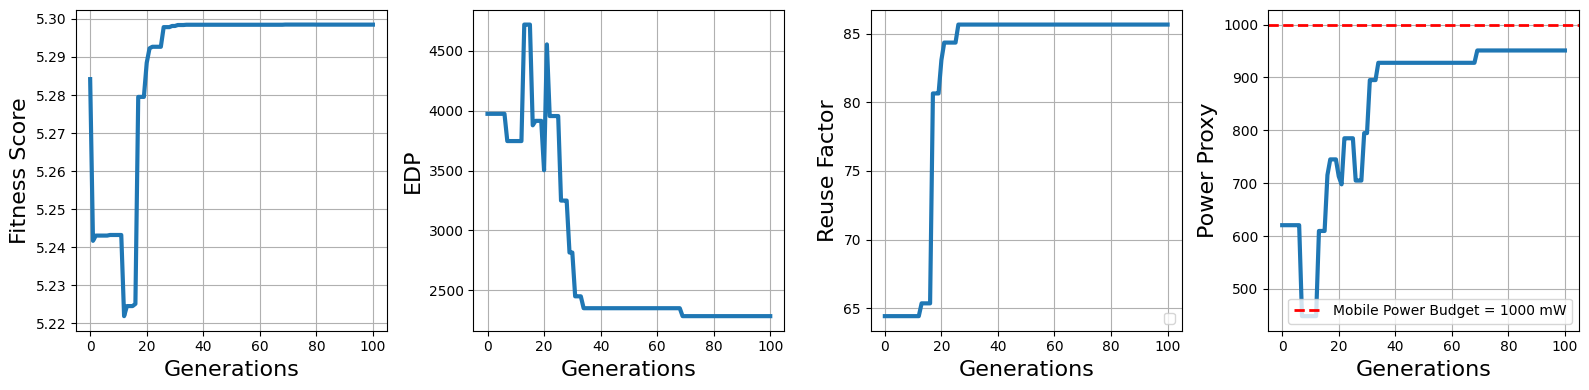

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def get_sorted_files(dir_path):
    file_list = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    sorted_files = sorted(file_list)
    return sorted_files

# MobileNetv3-[5]
# InceptionV3-[16]


# Base directory for the CSV files
dir_path = 'out/magneto_power_constraint/BERT_qk'
file_name = get_sorted_files(dir_path)

# Initialize a dictionary to store fitness values
fitness_data = {}
edp_data = {}
reuse_data = {}
power_data = {}

# MODELS = ['VGG16_conv1', 'BERT_qk', 'BERT_ffn', 'MobileViT', 'YOLOv8', 'MobileNetv3', 'InceptionV3', 'VGG16']
MODEL = 'BERT_qk'
file_path = f'{dir_path}/{file_name[17]}'
try:
	df = pd.read_csv(file_path)

	# Extract the "Best Fitness Score" column
	if 'Best Fitness Score' in df.columns:
		fitness_data[MODEL] = df['Best Fitness Score'].tolist()
	else:
		print(f"'Best Fitness Score' column not found in {file_path}")
		
	# Extract the "Best EDP" column
	if 'Best EDP' in df.columns:
		edp_data[MODEL] = df['Best EDP'].tolist()
	else:
		print(f"'Best EDP' column not found in {file_path}")
	
	# Extract the "Best Power Proxy" column
	if 'Best Power Proxy' in df.columns:
		power_data[MODEL] = df['Best Power Proxy'].tolist()
	else:
		print(f"'Best Power Proxy' column not found in {file_path}")
		
	# Extract the "Best Reuse Factor" column
	if 'Best Reuse Factor' in df.columns:
		reuse_data[MODEL] = df['Best Reuse Factor'].tolist()
	else:
		print(f"'Best Reuse Factor' column not found in {file_path}")

except FileNotFoundError:
	print(f"File not found: {file_path}")
except Exception as e:
	print(f"Error processing {file_path}: {e}")

# Create side-by-side plots
fig, axes = plt.subplots(1, 4, figsize=(16,4))  # Two 6x6 plots side by side

# Plot Fitness Scores
for LAYER, scores in fitness_data.items():
    axes[0].plot(scores, linewidth=3)
axes[0].set_xlabel('Generations', fontsize=16)
axes[0].set_ylabel('Fitness Score', fontsize=16)
# axes[0].set_title('Fitness Score', fontsize=14)
axes[0].grid(True)

# Plot EDP Scores
for LAYER, edp_scores in edp_data.items():
    axes[1].plot(edp_scores, linewidth=3)
axes[1].set_xlabel('Generations', fontsize=16)
axes[1].set_ylabel('EDP', fontsize=16)
# axes[1].set_title('EDP', fontsize=14)
axes[1].grid(True)

for LAYER, reuse_scores in reuse_data.items():
    axes[2].plot(reuse_scores, linewidth=3)
axes[2].set_xlabel('Generations', fontsize=16)
axes[2].set_ylabel('Reuse Factor', fontsize=16)
# axes[2].set_title('Reuse Factor', fontsize=14)
axes[2].grid(True)
axes[2].legend(loc='lower right')

for LAYER, power_scores in power_data.items():
    axes[3].plot(power_scores, linewidth=3)
axes[3].set_xlabel('Generations', fontsize=16)
axes[3].set_ylabel('Power Proxy', fontsize=16)
# axes[3].set_title('Power Proxy', fontsize=14)
axes[3].axhline(y=1000, color='red', linestyle='--', linewidth=2, label='Mobile Power Budget = 1000 mW')
# axes[3].set_ylim(700, 1050)
axes[3].grid(True)
axes[3].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()


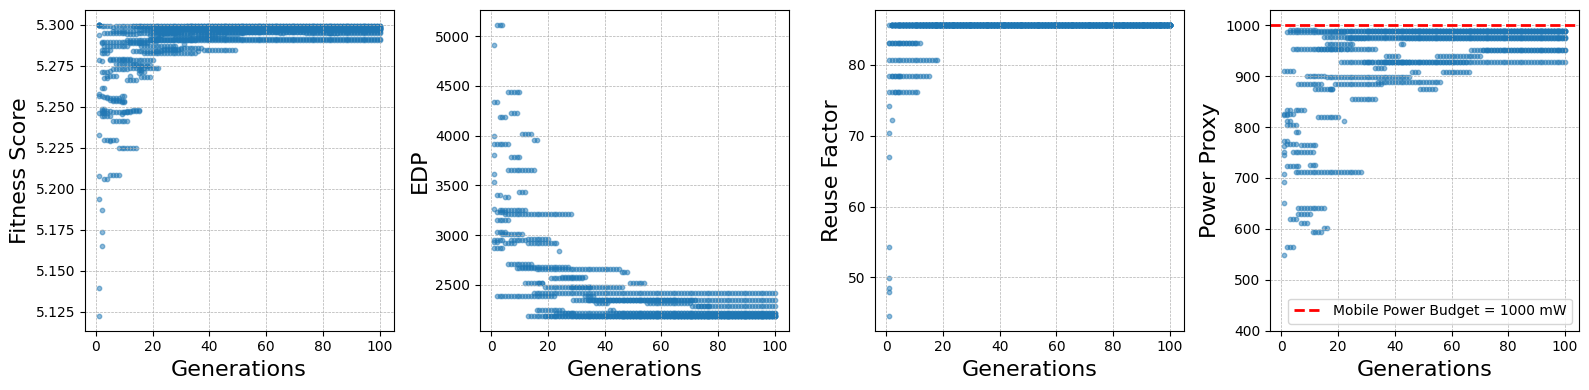

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def remove_outliers_iqr(row):
    q1 = np.percentile(row, 25)  # 25th percentile (Q1)
    q3 = np.percentile(row, 75)  # 75th percentile (Q3)
    iqr = q3 - q1  # Interquartile Range
    lower_bound = q1 - 1.5 * iqr  # Lower fence
    upper_bound = q3 + 1.5 * iqr  # Upper fence
    return [value if lower_bound <= value <= upper_bound else None for value in row]  # Replace outliers with None

fig, axes = plt.subplots(1, 4, figsize=(16,4))  # Two 6x6 plots side by side
generations = [i for i in range(1, 101)]

file_path = "out/generations_BERT_qk_best_fitness_score.csv"
data = pd.read_csv(file_path, header=None)[1:]
filtered_data = data.apply(remove_outliers_iqr)
filtered_data = filtered_data.dropna() 
for i in range(filtered_data.shape[0]):  # Iterate through rows (files)
    axes[0].scatter(generations, filtered_data.iloc[i], color='C0', alpha=0.5, s=10)
axes[0].set_xlabel("Generations", fontsize=16)
axes[0].set_ylabel("Fitness Score", fontsize=16)
axes[0].grid(True, linestyle='--', linewidth=0.5)

file_path = "out/generations_BERT_qk_best_edp.csv"
data = pd.read_csv(file_path, header=None)[1:]
filtered_data = data.apply(remove_outliers_iqr)
filtered_data = filtered_data.dropna() 
for i in range(filtered_data.shape[0]):  # Iterate through rows (files)
    axes[1].scatter(generations, filtered_data.iloc[i], color='C0', alpha=0.5, s=10)
axes[1].set_xlabel("Generations", fontsize=16)
axes[1].set_ylabel("EDP", fontsize=16)
axes[1].grid(True, linestyle='--', linewidth=0.5)

file_path = "out/generations_BERT_qk_best_reuse_factor.csv"
data = pd.read_csv(file_path, header=None)[1:]
filtered_data = data.apply(remove_outliers_iqr)
filtered_data = filtered_data.dropna() 
for i in range(filtered_data.shape[0]):  # Iterate through rows (files)
    axes[2].scatter(generations, filtered_data.iloc[i], color='C0', alpha=0.5, s=10)
axes[2].set_xlabel("Generations", fontsize=16)
axes[2].set_ylabel("Reuse Factor", fontsize=16)
axes[2].grid(True, linestyle='--', linewidth=0.5)

file_path = "out/generations_BERT_qk_best_power_proxy.csv"
data = pd.read_csv(file_path, header=None)[1:]
filtered_data = data.apply(remove_outliers_iqr)
filtered_data = filtered_data.dropna() 
for i in range(filtered_data.shape[0]):  # Iterate through rows (files)
    axes[3].scatter(generations, filtered_data.iloc[i], color='C0', alpha=0.5, s=10)
axes[3].set_xlabel("Generations", fontsize=16)
axes[3].set_ylabel("Power Proxy", fontsize=16)
axes[3].axhline(y=1000, color='red', linestyle='--', linewidth=2, label='Mobile Power Budget = 1000 mW')
axes[3].set_ylim(400,1030)
axes[3].legend(loc='lower right', fontsize=10)
axes[3].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## 2. Power Feasibility

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Configurations
# MODELS = ['VGG16_conv1', 'BERT_qk', 'BERT_ffn', 'InceptionV3', 'MobileNetv3', 'MobileViT', 'VGG16', 'YOLOv8']
MODELS = ['VGG16_conv1', 'BERT_qk', 'BERT_ffn', 'MobileViT', 'YOLOv8']
ACCELERATORS = ['Eyeriss-like', 'ShiDianNao-like', 'NVDLA-like']
POWER_BUDGET = 1000

def get_last_metric_values_magneto(directory_path, metric='Best Power Proxy'):
    """
	Input1: out/magneto_power_constraint/{MODEL}
	Input2: Best Fitness Score,Best Cycle,Best EDP,Best Memory Access,Best Reuse Factor,Best Power Proxy,Best Mapper
	Output: [value1, value2, value3, ...] of the given metric, given model (by directory path)
	"""
    result_values_list = []
    csv_files = sorted([file for file in os.listdir(directory_path) if file.startswith('fitness_') and file.endswith('.csv')])
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        try:
            df = pd.read_csv(file_path)
            if metric == 'Best Cycle':
                result_values_list.append(df['Best Cycle'].iloc[-1])
            elif metric == 'Best EDP':
                result_values_list.append(df['Best EDP'].iloc[-1])
            elif metric == 'Best Memory Access':
                result_values_list.append(df['Best Memory Access'].iloc[-1])
            elif metric == 'Best Reuse Factor':
                result_values_list.append(df['Best Reuse Factor'].iloc[-1])
            elif metric == 'Best Power Proxy':
                result_values_list.append(df['Best Power Proxy'].iloc[-1])
            elif metric == 'Best Mapper':
                result_values_list.append(df['Best Mapper'].iloc[-1])
            else:
                print(f"'Best Power Proxy' column not found in {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return result_values_list

def get_model_wise_perf_list_existing_dataflow(
    	accelerator='eyeriss', 
     	metric='Power Proxy',
      	models=['VGG16_conv1', 'BERT_qk', 'BERT_ffn', 'MobileViT', 'YOLOv8']
    ):
    """
    # Input1: 'nvdla', 'shidiannao', 'eyeriss'
    # Input2: 'Model', 'Power Proxy', 'Cycles', 'Runtime (s)', 'EDP', 'Memory Access', 'Reuse Factor'
    # Output: [model1 value, model2 value, model3 value, ...]
    """
    # Read the CSV file
    csv_file = 'out/summary_results_existing_accelerators.csv'
    df = pd.read_csv(csv_file)

    result_values_dict = None
    grouped = df[df['Accelerator'] == accelerator]
    if metric == 'Power Proxy':
        result_values_dict = dict(zip(grouped['Model'], grouped['Power Proxy']))
    elif metric == 'Cycles':
        result_values_dict = dict(zip(grouped['Model'], grouped['Cycles']))
    elif metric == 'Runtime (s)':
        result_values_dict = dict(zip(grouped['Model'], grouped['Runtime (s)']))
    elif metric == 'EDP':
        result_values_dict = dict(zip(grouped['Model'], grouped['EDP']))
    elif metric == 'Memory Access':
        result_values_dict = dict(zip(grouped['Model'], grouped['Memory Access']))
    elif metric == 'Reuse Factor':
        result_values_dict = dict(zip(grouped['Model'], grouped['Reuse Factor']))
    return [result_values_dict.get(model, np.nan) for model in models]

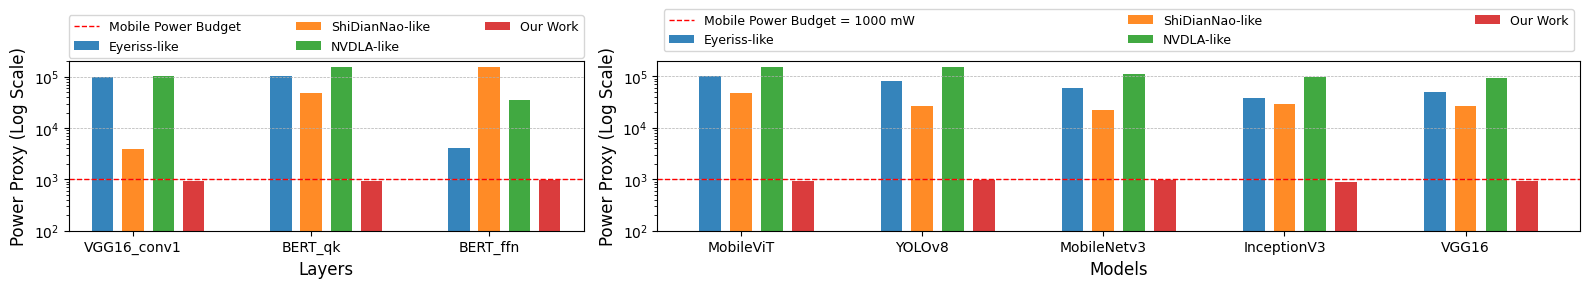

In [4]:
from matplotlib import gridspec

fig = plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(1, 2, width_ratios=[4.3, 7.7], figure=fig)
bar_width = 0.12
our_work_dict = {}

MODELS = ['VGG16_conv1', 'BERT_qk', 'BERT_ffn']
for MODEL in MODELS:
    dir_power_constraint = f'out/magneto_power_constraint/{MODEL}'
    magneto_result = get_last_metric_values_magneto(dir_power_constraint, 'Best Power Proxy')
    our_work_dict[MODEL] = magneto_result
our_work_list_model_wise = [our_work_dict.get(model) for model in MODELS]

magneto_power_values = []
for a in our_work_list_model_wise:
    magneto_power_values.append(np.mean(a))

nvdla_values = get_model_wise_perf_list_existing_dataflow('nvdla', 'Power Proxy', MODELS)
shidiannao_values = get_model_wise_perf_list_existing_dataflow('shidiannao', 'Power Proxy', MODELS)
eyeriss_values = get_model_wise_perf_list_existing_dataflow('eyeriss', 'Power Proxy', MODELS)

# plt.figure(figsize=(6, 4))
x = np.arange(len(MODELS))

ax0 = fig.add_subplot(gs[0])
ax0.bar(x - bar_width - 0.05, eyeriss_values, width=bar_width, label='Eyeriss-like', alpha=0.9)
ax0.bar(x, shidiannao_values, width=bar_width, label='ShiDianNao-like', alpha=0.9)
ax0.bar(x + bar_width + 0.05, nvdla_values, width=bar_width, label='NVDLA-like', alpha=0.9)
ax0.bar(x + bar_width*2 + 0.1, magneto_power_values, width=bar_width, label='Our Work', alpha=0.9)

# Customizing plot
ax0.set_yscale('log')
ax0.set_xlabel('Layers', fontsize=12)
ax0.set_ylabel('Power Proxy (Log Scale)', fontsize=12)
# ax0.title('Power Proxy Comparison of Dataflows', fontsize=14)
ax0.set_xticks(x, MODELS)
ax0.set_ylim(100, )
ax0.axhline(y=1000, color='red', linestyle='--', linewidth=1, label='Mobile Power Budget')
# ax0.legend(loc='upper right')
ax0.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3, fontsize=9)
ax0.grid(axis='y', linestyle='--', linewidth=0.5)

# -----
MODELS = ['MobileViT', 'YOLOv8', 'MobileNetv3', 'InceptionV3', 'VGG16']
for MODEL in MODELS:
    dir_power_constraint = f'out/magneto_power_constraint/{MODEL}'
    dir_no_constraint = f'out/magneto_no_constraint/{MODEL}'
    magneto_result = get_last_metric_values_magneto(dir_power_constraint, 'Best Power Proxy')
    our_work_dict[MODEL] = magneto_result
our_work_list_model_wise = [our_work_dict.get(model) for model in MODELS]

magneto_power_values = []
for data in our_work_list_model_wise:
    magneto_power_values.append(np.mean(data))

nvdla_values = get_model_wise_perf_list_existing_dataflow('nvdla', 'Power Proxy', MODELS)
shidiannao_values = get_model_wise_perf_list_existing_dataflow('shidiannao', 'Power Proxy', MODELS)
eyeriss_values = get_model_wise_perf_list_existing_dataflow('eyeriss', 'Power Proxy', MODELS)

# plt.figure(figsize=(6, 4))
x = np.arange(len(MODELS))
ax1 = fig.add_subplot(gs[1])
ax1.bar(x - bar_width - 0.05, eyeriss_values, width=bar_width, label='Eyeriss-like', alpha=0.9)
ax1.bar(x, shidiannao_values, width=bar_width, label='ShiDianNao-like', alpha=0.9)
ax1.bar(x + bar_width + 0.05, nvdla_values, width=bar_width, label='NVDLA-like', alpha=0.9)
ax1.bar(x + bar_width*2 + 0.1, magneto_power_values, width=bar_width, label='Our Work', alpha=0.9)

# Customizing plot
ax1.set_yscale('log')
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Power Proxy (Log Scale)', fontsize=12)
# ax1.text(0.5, 0.5, 'Power Proxy Comparison of Dataflows', fontsize=14)
ax1.set_xticks(x, MODELS)
ax1.set_ylim(100, )
ax1.axhline(y=1000, color='red', linestyle='--', linewidth=1, label='Mobile Power Budget = 1000 mW')
ax1.legend(loc='upper right')
ax1.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand",  ncol=3, fontsize=9)
ax1.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()


### Layer-Wise Analysis

### Per Power Analysis

### Multi-layer Model Analysis from the overall csv

In [5]:
import pandas as pd
import os

def get_other_metrics_attempts(base_dir, accelerator, model, metric='Throughput (MACs/Cycle)'):
    """
    Extracts metric values from a CSV file filtered by accelerator and model.

    Parameters:
    - base_dir (str): The base directory where the CSV file is located.
    - accelerator (str): The name of the accelerator (e.g., 'eyeriss').
    - model (str): The name of the model (e.g., 'BERT_qk').
    - metric (str): The column name of the desired metric in the CSV file.

    Returns:
    - List of metric values (floats).
    """
    csv_path = os.path.join(base_dir, f"{accelerator}_{model}.csv")
    df = pd.read_csv(csv_path)
    layer_names = df.loc[:, " Layer Number"].drop_duplicates().tolist()
    len_layers = len(layer_names)

    combined_metrics = []
    start_idx = 0

    while start_idx < len(df):
        end_idx = start_idx + len_layers
        group = df.iloc[start_idx:end_idx]
        combined_metric = None
        
        if metric == 'Throughput':
            cycles = group[' Runtime (Cycles)'].sum()
            macs = group[' Num MACs'].sum()
            combined_metric = macs / cycles
        elif metric == 'MACs':
            macs = group[' Num MACs'].sum()
            combined_metric = macs
        elif metric == 'Cycles':
            cycles = group[' Runtime (Cycles)'].sum()
            combined_metric = cycles
        elif metric == 'Runtime (s)':
            delay_s = group[' Runtime (Cycles)'].sum() / (350 * 1e6)
            combined_metric = delay_s
        elif metric == 'EDP':
            cycles = group[' Runtime (Cycles)'].sum()
            macs = group[' Num MACs'].sum()
            l1_access = group[' input l1 read'].sum() + group[' input l1 write'].sum() + \
                        group['filter l1 read'].sum() + group[' filter l1 write'].sum() + \
                        group['output l1 read'].sum() + group[' output l1 write'].sum()
            l2_access = group[' input l2 read'].sum() + group[' input l2 write'].sum() + \
                        group[' filter l2 read'].sum() + group[' filter l2 write'].sum() + \
                        group[' output l2 read'].sum() + group[' output l2 write'].sum()
            dram_access = (group[' Offchip BW Req (Elements/cycle)'] * group[' Runtime (Cycles)']).sum()
            energy_nJ = macs * 0.48 + l1_access * 0.15 + l2_access * 3.69 + dram_access * 31.2 * 1e-3
            delay_s = cycles / (350 * 1e6) # frequency = 350 MHz
            edp_nJ = energy_nJ * delay_s
            combined_metric = edp_nJ
        elif metric == 'L2 Access':
            l2_access = group[' input l2 read'].sum() + group[' input l2 write'].sum() + \
                        group[' filter l2 read'].sum() + group[' filter l2 write'].sum() + \
                        group[' output l2 read'].sum() + group[' output l2 write'].sum()
            combined_metric = l2_access
        elif metric == 'DRAM Access':
            dram_access = (group[' Offchip BW Req (Elements/cycle)'] * group[' Runtime (Cycles)']).sum()
            combined_metric = dram_access
        elif metric == 'Reuse Factor':
            #  ' input reuse factor', ' filter reuse factor', ' output reuse factor'
            reuse_factor = (group[' input reuse factor'] + group[' filter reuse factor'] + group[' output reuse factor']).mean()
            combined_metric = reuse_factor
        elif metric == 'Ops / J':
            cycles = group[' Runtime (Cycles)'].sum()
            macs = group[' Num MACs'].sum()
            l1_access = group[' input l1 read'].sum() + group[' input l1 write'].sum() + \
                        group['filter l1 read'].sum() + group[' filter l1 write'].sum() + \
                        group['output l1 read'].sum() + group[' output l1 write'].sum()
            l2_access = group[' input l2 read'].sum() + group[' input l2 write'].sum() + \
                        group[' filter l2 read'].sum() + group[' filter l2 write'].sum() + \
                        group[' output l2 read'].sum() + group[' output l2 write'].sum()
            dram_access = (group[' Offchip BW Req (Elements/cycle)'] * group[' Runtime (Cycles)']).sum()
            energy_nJ = macs * 0.48 + l1_access * 0.15 + l2_access * 3.69 + dram_access * 31.2 * 1e-3
            ops_per_j = macs / energy_nJ * 1e9
            combined_metric = ops_per_j
        elif metric == 'EDP / Power':
            cycles = group[' Runtime (Cycles)'].sum()
            macs = group[' Num MACs'].sum()
            l1_access = group[' input l1 read'].sum() + group[' input l1 write'].sum() + \
                        group['filter l1 read'].sum() + group[' filter l1 write'].sum() + \
                        group['output l1 read'].sum() + group[' output l1 write'].sum()
            l2_access = group[' input l2 read'].sum() + group[' input l2 write'].sum() + \
                        group[' filter l2 read'].sum() + group[' filter l2 write'].sum() + \
                        group[' output l2 read'].sum() + group[' output l2 write'].sum()
            dram_access = (group[' Offchip BW Req (Elements/cycle)'] * group[' Runtime (Cycles)']).sum()
            energy_nJ = macs * 0.48 + l1_access * 0.15 + l2_access * 3.69 + dram_access * 31.2 * 1e-3
            delay_s = cycles / (350 * 1e6) # frequency = 350 MHz
            edp_nJ = energy_nJ * delay_s
            power_proxy = (energy_nJ) / cycles * 350 + 100
            combined_metric = edp_nJ / power_proxy
            # combined_metric = delay_s * ( cycles * 350 + 100)
        elif metric == 'Throughput / Power':
            cycles = group[' Runtime (Cycles)'].sum()
            macs = group[' Num MACs'].sum()
            l1_access = group[' input l1 read'].sum() + group[' input l1 write'].sum() + \
                        group['filter l1 read'].sum() + group[' filter l1 write'].sum() + \
                        group['output l1 read'].sum() + group[' output l1 write'].sum()
            l2_access = group[' input l2 read'].sum() + group[' input l2 write'].sum() + \
                        group[' filter l2 read'].sum() + group[' filter l2 write'].sum() + \
                        group[' output l2 read'].sum() + group[' output l2 write'].sum()
            dram_access = (group[' Offchip BW Req (Elements/cycle)'] * group[' Runtime (Cycles)']).sum()
            energy_nJ = macs * 0.48 + l1_access * 0.15 + l2_access * 3.69 + dram_access * 31.2 * 1e-3
            power_proxy = (energy_nJ) / cycles * 350 + 100
            throughput = macs / cycles
            combined_metric = throughput / power_proxy

        combined_metrics.append(combined_metric)
        start_idx = end_idx

    return combined_metrics

In [6]:
def get_layer_wise_comparison(model='YOLOv8', metric="Throughput / Power", accum='mean'):
	base_dir = f"out/magneto_layer_wise/{model}"
	accelerator = "magneto"

	magneto_result_layer_wise = []
	for i in range(6):
		directory_path = f'{base_dir}/layer{i}'
		metric_attempts_list = get_other_metrics_attempts(directory_path, accelerator, model, metric)
		if accum == 'mean':
			magneto_result_layer_wise.append(np.mean(metric_attempts_list))
		elif accum=='min':
			magneto_result_layer_wise.append(np.min(metric_attempts_list))
		elif accum=='max':
			magneto_result_layer_wise.append(np.max(metric_attempts_list))
	# print(magneto_result_layer_wise)

	eyeriss_layer_wise_value = []
	directory_path = 'out/eyeriss'
	accelerator = 'eyeriss'
	eyeriss_result_multi_layer = get_other_metrics_attempts(directory_path, accelerator, model, metric)
	# print(eyeriss_result_multi_layer)

	shidiannao_layer_wise_value = []
	directory_path = 'out/shidiannao'
	accelerator = 'shidiannao'
	shidiannao_result_multi_layer = get_other_metrics_attempts(directory_path, accelerator, model, metric)
	# print(shidiannao_result_multi_layer)

	nvdla_layer_wise_value = []
	directory_path = 'out/nvdla'
	accelerator = 'nvdla'
	nvdla_result_multi_layer = get_other_metrics_attempts(directory_path, accelerator, model, metric)
	# print(nvdla_result_multi_layer)

	return magneto_result_layer_wise, eyeriss_result_multi_layer[0], shidiannao_result_multi_layer[0], nvdla_result_multi_layer[0]

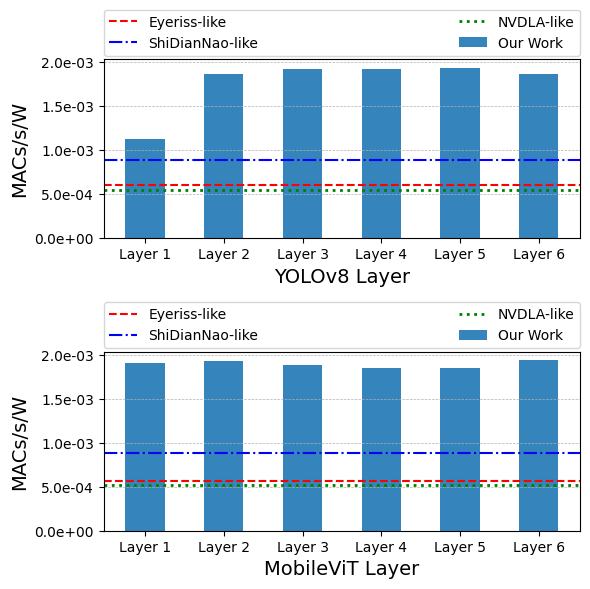

In [7]:
# plot of 'Throughput / Power' for each layer
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

# Throughput per Watt or MACs/s/W (model='YOLOv8', metric="Throughput / Power", accum='min'):
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharey=False)
# fig.suptitle('Throughput per Watt (MACs/s/W)', fontsize=14, y=1.02)

def scientific_format(x, pos):
    return f'{x:.1e}'  # Use scientific notation

# YOLOv8
layer_names = [f'Layer {i}' for i in range(1,7)]

data_yolov8 = get_layer_wise_comparison(model='YOLOv8',metric="Throughput / Power", accum='mean')
magneto_yolov8, eyeriss_yolov8, shidiannao_yolov8, nvdla_yolov8 = data_yolov8

x_positions = np.arange(1, len(magneto_yolov8) + 1)  # Boxplot x-ticks start from 1, so adjust x accordingly
axes[0].bar(x_positions, magneto_yolov8, width=0.5, label='Our Work', alpha=0.9)
axes[0].set_xlabel("YOLOv8 Layer", fontsize=14)
axes[0].set_ylabel("MACs/s/W", fontsize=14)
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(layer_names)
axes[0].axhline(y=eyeriss_yolov8, color='red', linestyle='--', linewidth=1.5, label='Eyeriss-like')
axes[0].axhline(y=shidiannao_yolov8, color='blue', linestyle='-.', linewidth=1.5, label='ShiDianNao-like')
axes[0].axhline(y=nvdla_yolov8, color='green', linestyle=':', linewidth=2, label='NVDLA-like')
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[0].yaxis.set_major_formatter(FuncFormatter(scientific_format))
# axes[0].legend(loc='lower right')
axes[0].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2, fontsize=10)

# MobileViT
data_mobilevit = get_layer_wise_comparison(model='MobileViT',metric="Throughput / Power", accum='mean')
magneto_mobilevit, eyeriss_mobilevit, shidiannao_mobilevit, nvdla_mobilevit = data_mobilevit

axes[1].bar(x_positions, magneto_mobilevit, width=0.5, label='Our Work', alpha=0.9)
axes[1].set_xlabel("MobileViT Layer", fontsize=14)
axes[1].set_ylabel("MACs/s/W", fontsize=14)
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(layer_names)
axes[1].axhline(y=eyeriss_mobilevit, color='red', linestyle='--', linewidth=1.5, label='Eyeriss-like')
axes[1].axhline(y=shidiannao_mobilevit, color='blue', linestyle='-.', linewidth=1.5, label='ShiDianNao-like')
axes[1].axhline(y=nvdla_mobilevit, color='green', linestyle=':', linewidth=2, label='NVDLA-like')
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].yaxis.set_major_formatter(FuncFormatter(scientific_format))
# axes[1].legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

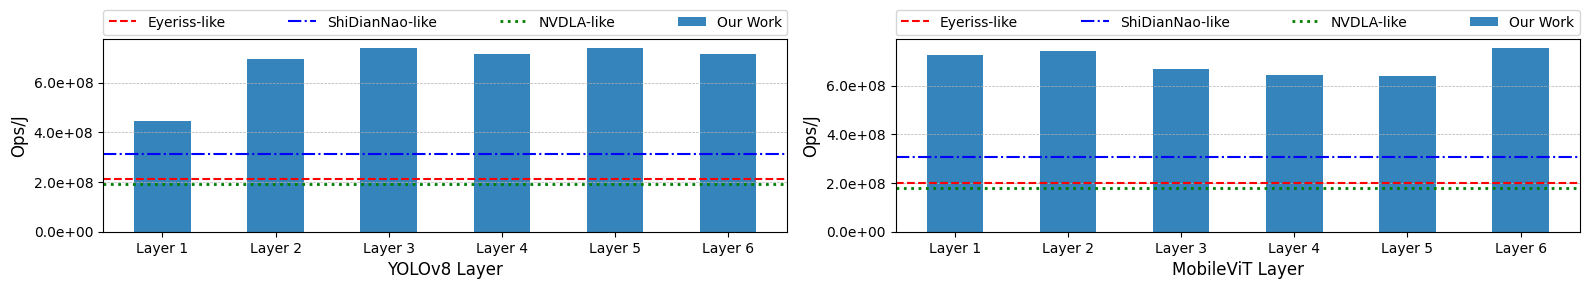

In [8]:
# plot of 'Ops / J' for each layer
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

# Throughput per Watt or MACs/s/W (model='YOLOv8', metric="Ops / J", accum='mean'):
fig, axes = plt.subplots(1, 2, figsize=(16, 3), sharey=False)
# fig.suptitle('Energy Efficiency (Ops / J)', fontsize=14, y=1.02)

def scientific_format(x, pos):
    return f'{x:.1e}'  # Use scientific notation

# YOLOv8
layer_names = [f'Layer {i}' for i in range(1,7)]

data_yolov8 = get_layer_wise_comparison(model='YOLOv8',metric="Ops / J", accum='min')
magneto_yolov8, eyeriss_yolov8, shidiannao_yolov8, nvdla_yolov8 = data_yolov8

x_positions = np.arange(1, len(magneto_yolov8) + 1)  # Boxplot x-ticks start from 1, so adjust x accordingly
axes[0].bar(x_positions, magneto_yolov8, width=0.5, label='Our Work', alpha=0.9)
axes[0].set_xlabel("YOLOv8 Layer", fontsize=12)
axes[0].set_ylabel("Ops/J", fontsize=12)
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(layer_names)
axes[0].axhline(y=eyeriss_yolov8, color='red', linestyle='--', linewidth=1.5, label='Eyeriss-like')
axes[0].axhline(y=shidiannao_yolov8, color='blue', linestyle='-.', linewidth=1.5, label='ShiDianNao-like')
axes[0].axhline(y=nvdla_yolov8, color='green', linestyle=':', linewidth=2, label='NVDLA-like')
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[0].yaxis.set_major_formatter(FuncFormatter(scientific_format))
# axes[0].legend(loc='lower right')
axes[0].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4, fontsize=10)

# MobileViT
data_mobilevit = get_layer_wise_comparison(model='MobileViT', metric="Ops / J", accum='min')
magneto_mobilevit, eyeriss_mobilevit, shidiannao_mobilevit, nvdla_mobilevit = data_mobilevit

axes[1].bar(x_positions, magneto_mobilevit, width=0.5, label='Our Work', alpha=0.9)
axes[1].set_xlabel("MobileViT Layer", fontsize=12)
axes[1].set_ylabel("Ops/J", fontsize=12)
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(layer_names)
axes[1].axhline(y=eyeriss_mobilevit, color='red', linestyle='--', linewidth=1.5, label='Eyeriss-like')
axes[1].axhline(y=shidiannao_mobilevit, color='blue', linestyle='-.', linewidth=1.5, label='ShiDianNao-like')
axes[1].axhline(y=nvdla_mobilevit, color='green', linestyle=':', linewidth=2, label='NVDLA-like')
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].yaxis.set_major_formatter(FuncFormatter(scientific_format))
# axes[1].legend(loc='lower right')
axes[1].legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4, fontsize=10)

plt.tight_layout()
plt.show()

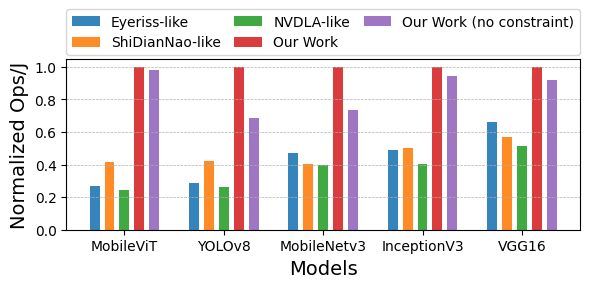

In [11]:
# 'Throughput / Power', 'Ops / J'
MODELS = ['MobileViT', 'YOLOv8', 'MobileNetv3', 'InceptionV3', 'VGG16']
magneto_no_constraint_eeff_list = []
magneto_eeff_list = []
eyeriss_eeff_list = []
shidiannao_eeff_list = []
nvdla_eeff_list = []

for MODEL in MODELS:
	magneto_no_constraint_eeff = get_other_metrics_attempts('out/magneto_no_constraint', 'magneto', MODEL, 'Ops / J')
	magneto_eeff = get_other_metrics_attempts('out/magneto_power_constraint', 'magneto', MODEL, 'Ops / J')
	eyeriss_eeff = get_other_metrics_attempts('out/eyeriss', 'eyeriss', MODEL, 'Ops / J')
	shidiannao_eeff = get_other_metrics_attempts('out/shidiannao', 'shidiannao', MODEL, 'Ops / J')
	nvdla_eeff = get_other_metrics_attempts('out/nvdla', 'nvdla', MODEL, 'Ops / J')

	magneto_no_constraint_eeff_list.append(np.mean(magneto_no_constraint_eeff))
	magneto_eeff_list.append(np.mean(magneto_eeff))
	eyeriss_eeff_list.append(eyeriss_eeff[0])
	shidiannao_eeff_list.append(shidiannao_eeff[0])
	nvdla_eeff_list.append(nvdla_eeff[0])

# Normalize each list by magneto_eeff_list values
eyeriss_eeff_list_norm = [v / m if m != 0 else 0 for v, m in zip(eyeriss_eeff_list, magneto_eeff_list)]
shidiannao_eeff_list_norm = [v / m if m != 0 else 0 for v, m in zip(shidiannao_eeff_list, magneto_eeff_list)]
nvdla_eeff_list_norm = [v / m if m != 0 else 0 for v, m in zip(nvdla_eeff_list, magneto_eeff_list)]
magneto_no_constraint_eeff_list_norm = [v / m if m != 0 else 0 for v, m in zip(magneto_no_constraint_eeff_list, magneto_eeff_list)]
magneto_eeff_list_norm = [1 for _ in magneto_eeff_list]  # Normalize against itself, so it's always 1

# Bar width and x positions
bar_width = 0.1
x = np.arange(len(MODELS))

# Plot
plt.figure(figsize=(6, 3))
plt.bar(x - bar_width*2 - 0.1, eyeriss_eeff_list_norm, width=bar_width, label='Eyeriss-like', alpha=0.9)
plt.bar(x - bar_width - 0.05, shidiannao_eeff_list_norm, width=bar_width, label='ShiDianNao-like', alpha=0.9)
plt.bar(x, nvdla_eeff_list_norm, width=bar_width, label='NVDLA-like', alpha=0.9)
plt.bar(x + bar_width + 0.05, magneto_eeff_list_norm, width=bar_width, label='Our Work', alpha=0.9)
plt.bar(x + bar_width*2 + 0.1, magneto_no_constraint_eeff_list_norm, width=bar_width, label='Our Work (no constraint)', alpha=0.9)

# Customizing plot
plt.xlabel('Models', fontsize=14)
plt.ylabel('Normalized Ops/J', fontsize=14)
# plt.title('Energy Efficiency Comparison', fontsize=14)
plt.xticks(x, MODELS)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

# Show plot
plt.tight_layout()
plt.show()


[np.float64(0.0019053077959194787), np.float64(0.0018979832829026638), np.float64(0.0020700433303567868), np.float64(0.0022500985110956774), np.float64(0.0021520247083401953)]
[np.float64(0.0005664433001252185), np.float64(0.0006017455358581673), np.float64(0.0010866865108573995), np.float64(0.0012471993819495157), np.float64(0.0015981505869803493)]
[np.float64(0.000881026539872395), np.float64(0.0008904083625995987), np.float64(0.0009332498635044684), np.float64(0.0012797472661654117), np.float64(0.0013740409674732183)]
[np.float64(0.0005164451428956328), np.float64(0.0005482335066338901), np.float64(0.000911940935145187), np.float64(0.001031504098657241), np.float64(0.0012404897723548866)]


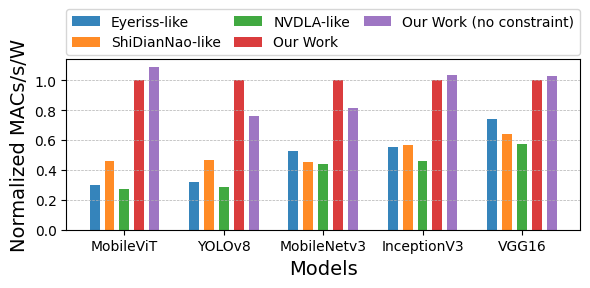

In [10]:
# 'Ops / J', 'Throughput / Power'
MODELS = ['MobileViT', 'YOLOv8', 'MobileNetv3', 'InceptionV3', 'VGG16']
magneto_no_constraint_opsj_list = []
magneto_opsj_list = []
eyeriss_opsj_list = []
shidiannao_opsj_list = []
nvdla_opsj_list = []

for MODEL in MODELS:
	magneto_no_constraint_opsj = get_other_metrics_attempts('out/magneto_no_constraint', 'magneto', MODEL, 'Throughput / Power')
	magneto_opsj = get_other_metrics_attempts('out/magneto_power_constraint', 'magneto', MODEL, 'Throughput / Power')
	eyeriss_opsj = get_other_metrics_attempts('out/eyeriss', 'eyeriss', MODEL, 'Throughput / Power')
	shidiannao_opsj = get_other_metrics_attempts('out/shidiannao', 'shidiannao', MODEL, 'Throughput / Power')
	nvdla_opsj = get_other_metrics_attempts('out/nvdla', 'nvdla', MODEL, 'Throughput / Power')

	magneto_no_constraint_opsj_list.append(np.mean(magneto_no_constraint_opsj))
	magneto_opsj_list.append(np.mean(magneto_opsj))
	eyeriss_opsj_list.append(eyeriss_opsj[0])
	shidiannao_opsj_list.append(shidiannao_opsj[0])
	nvdla_opsj_list.append(nvdla_opsj[0])
 
print(magneto_opsj_list)
print(eyeriss_opsj_list)
print(shidiannao_opsj_list)
print(nvdla_opsj_list)

# Normalize each list by magneto_opsj_list values
eyeriss_opsj_list_norm = [v / m if m != 0 else 0 for v, m in zip(eyeriss_opsj_list, magneto_opsj_list)]
shidiannao_opsj_list_norm = [v / m if m != 0 else 0 for v, m in zip(shidiannao_opsj_list, magneto_opsj_list)]
nvdla_opsj_list_norm = [v / m if m != 0 else 0 for v, m in zip(nvdla_opsj_list, magneto_opsj_list)]
magneto_no_constraint_opsj_list_norm = [v / m if m != 0 else 0 for v, m in zip(magneto_no_constraint_opsj_list, magneto_opsj_list)]
magneto_opsj_list_norm = [1 for _ in magneto_opsj_list]  # Normalize against itself, so it's always 1

# Bar width and x positions
bar_width = 0.1
x = np.arange(len(MODELS))

# Plot
plt.figure(figsize=(6, 3))
plt.bar(x - bar_width*2 - 0.1, eyeriss_opsj_list_norm, width=bar_width, label='Eyeriss-like', alpha=0.9)
plt.bar(x - bar_width - 0.05, shidiannao_opsj_list_norm, width=bar_width, label='ShiDianNao-like', alpha=0.9)
plt.bar(x, nvdla_opsj_list_norm, width=bar_width, label='NVDLA-like', alpha=0.9)
plt.bar(x + bar_width + 0.05, magneto_opsj_list_norm, width=bar_width, label='Our Work', alpha=0.9)
plt.bar(x + bar_width*2 + 0.1, magneto_no_constraint_opsj_list_norm, width=bar_width, label='Our Work (no constraint)', alpha=0.9)

# Customizing plot
plt.xlabel('Models', fontsize=14)
plt.ylabel('Normalized MACs/s/W', fontsize=14)
# plt.title('Energy Efficiency Comparison', fontsize=14)
plt.xticks(x, MODELS)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
# plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

# Show plot
plt.tight_layout()
plt.show()
